# DLProfile Example using Cosmic Tagger Application

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [7]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/cosmic_tagger/cosmic_run2_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

Loaded Pre-processed DXT DF from file: /tmp/temp_analysis/cosmic_run2_p8_io_dxt_df.csv
Loaded Pre-processed DF from file: /tmp/temp_analysis/cosmic_run2_p8_io_df.csv
Loaded Pre-processed Pattern file: /tmp/temp_analysis/cosmic_run2_p8_pattern.json
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [8]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/tmp/tmp66qu41ce',
 '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
 '/tmp/tmphfgkse3k',
 '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5',
 '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/checkpoint',
 '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.index',
 '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.data-00000-of-00001',
 '/tmp/tmplb8hllhq',
 '/tmp/tmpalpibp7q',
 '/tmp/tmp7nm4l3qc',
 '/tmp/tmpw8i445_z',
 '/tmp/tmpcnmnurcv',
 '/tmp/tmpbadhhqkx',
 '/tmp/tmpl8zm9nrv',
 '/tmp/tmpz44wgkwn',
 '/tmp/tmpu18lsxql',
 '/tmp/tmp7xppt7ag',
 '/tmp/tmp3x37c0i3',
 '/tmp/tmp_hxfhj25',
 '/tmp/tmp5avhrxc1',
 '/tmp/tmpup9vpdq7']


In [9]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/checkpoint',
 '/tmp/tmp66qu41ce',
 '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.data-00000-of-00001',
 '/tmp/tmphfgkse3k',
 '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.index',
 '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5',
 '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
 '/tmp/tmplb8hllhq',
 '/tmp/tmpalpibp7q',
 '/tmp/tmp7nm4l3qc',
 '/tmp/tmpw8i445_z',
 '/tmp/tmpbadhhqkx',
 '/tmp/tmpcnmnurcv',
 '/tmp/tmpl8zm9nrv',
 '/tmp/tmpz44wgkwn',
 '/tmp/tmpu18lsxql',
 '/tmp/tmp7xppt7ag',
 '/tmp/tmp_hxfhj25',
 '/tmp/tmp3x37c0i3',
 '/tmp/tmp5avhrxc1',
 '/tmp/tmpup9vpdq7',
 '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_650.ckpt.index.tempstate11757361503896287878',
 '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints

In [10]:
pandas.set_option('max_columns', None)
#print(df_normal.head())
pp.pprint(df_normal[df_normal['Filename'].eq("/gpfs/mira-home/dhari/code/learnIO/benchmarks/CosmicTagger/logdir/20200611-032531/plugins/profile/2020_06_11_03_41_37/nid03837.trace.json.gz")])

    Module  Rank POSIX_OPENS  \
282  STDIO     6           0   

                                              Filename            Mount   FS  \
282  /gpfs/mira-home/dhari/code/learnIO/benchmarks/...  /gpfs/mira-home  dvs   

    POSIX_FILENOS POSIX_DUPS  POSIX_READS  POSIX_WRITES POSIX_SEEKS  \
282             0          0            0             0           0   

    POSIX_STATS POSIX_MMAPS POSIX_FSYNCS POSIX_FDSYNCS POSIX_RENAME_SOURCES  \
282           0           0            0             0                    0   

    POSIX_RENAME_TARGETS POSIX_RENAMED_FROM POSIX_MODE  POSIX_BYTES_READ  \
282                    0                             0                 0   

     POSIX_BYTES_WRITTEN POSIX_MAX_BYTE_READ POSIX_MAX_BYTE_WRITTEN  \
282                    0                   0                      0   

     POSIX_CONSEC_READS  POSIX_CONSEC_WRITES  POSIX_SEQ_READS  \
282                   0                    0                0   

     POSIX_SEQ_WRITES POSIX_RW_SWITCHES POSIX

### Collect the summary of the Application

In [11]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	988.00 seconds
Time spent in I/O		:	46.40 seconds
% Time spent in I/O		:	4.70%
Total Data Accessed		:	2.44 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['write' 'read']
# of files used			:	21
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 6553600 bytes
	Average			:	5170 bytes
	Median			:	2529 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 762 MB/s
	Average			:	10 MB/s
	Median			:	6 MB/s
Access Pattern:
	Sequential		:	95.71%
	Consecutive		:	88.18%


Files Summary:
File Types			:	['' 'h5' 'index' 'data-00000-of-00001']
Dataset Size:
	Total			:	33.002 GB
	Min,Max			:	0.000 GB and 28.194 GB
	Average			:	5.500 GB


In [12]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 988.0 seconds'


In [13]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 46.40234999999964 seconds'


### I/O time spent on each file

In [14]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /tmp/tmp66qu41ce: 0.00 seconds
I/O time for file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5: 43.93 seconds
I/O time for file /tmp/tmphfgkse3k: 0.00 seconds
I/O time for file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5: 2.23 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/checkpoint: 0.00 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.index: 0.03 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.data-00000-of-00001: 1.87 seconds
I/O time for file /tmp/tmplb8hllhq: 0.00 seconds
I/O time for file /tmp/tmpalpibp7q: 0.00 seconds
I/O time for file /tmp/tmp7nm4l3qc: 0.00 seconds
I/O time for file /tmp/tmpw8i445_z: 0.00 seconds
I/O time for file /tmp/tmpcnmnurcv: 0.00 seconds
I/O time for file /tmp/tmpbadhhqkx: 0.00 seconds
I/O time for file /tmp/tmpl

### I/O Time spent per rank

In [15]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 73.51 seconds
I/O time for rank 1: 42.80 seconds
I/O time for rank 2: 42.84 seconds
I/O time for rank 3: 41.44 seconds
I/O time for rank 4: 47.00 seconds
I/O time for rank 5: 39.82 seconds
I/O time for rank 6: 41.71 seconds
I/O time for rank 7: 42.10 seconds


In [16]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 2.44 GB'

### I/O performed on each file

In [17]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /tmp/tmp66qu41ce: 0.00 MB
I/O performed on file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5: 1206.65 MB
I/O performed on file /tmp/tmphfgkse3k: 0.00 MB
I/O performed on file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5: 39.83 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/checkpoint: 0.00 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.index: 0.02 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.data-00000-of-00001: 298.00 MB
I/O performed on file /tmp/tmplb8hllhq: 0.00 MB
I/O performed on file /tmp/tmpalpibp7q: 0.00 MB
I/O performed on file /tmp/tmp7nm4l3qc: 0.00 MB
I/O performed on file /tmp/tmpw8i445_z: 0.00 MB
I/O performed on file /tmp/tmpcnmnurcv: 0.00 MB
I/O performed on file /tmp/tmpbadhhqkx: 0.00 MB
I/O performed on file /tmp/tmpl8zm9

In [18]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 467.51 MB
I/O performed by rank 1: 153.89 MB
I/O performed by rank 2: 154.69 MB
I/O performed by rank 3: 153.48 MB
I/O performed by rank 4: 154.15 MB
I/O performed by rank 5: 152.35 MB
I/O performed by rank 6: 153.54 MB
I/O performed by rank 7: 154.95 MB


In [19]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'checkpoint': 337.0,
 'cosmic_tagging_test': 5155110775.0,
 'cosmic_tagging_train': 30272777678.0,
 'events.out.tfevents.1591846022': 7512164.0,
 'events.out.tfevents.1591846270': 8140.0,
 'model_500.ckpt': 26200.0}


### How application access data over time.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df.csv


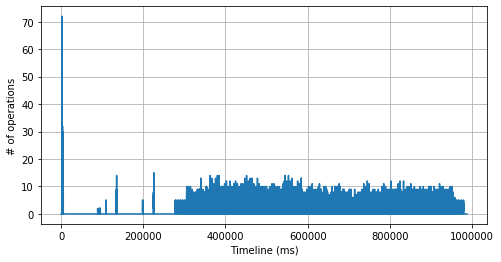

In [20]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);

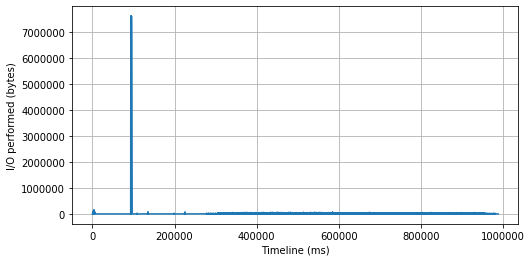

In [21]:
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("I/O performed (bytes)")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmp66qu41ce.csv


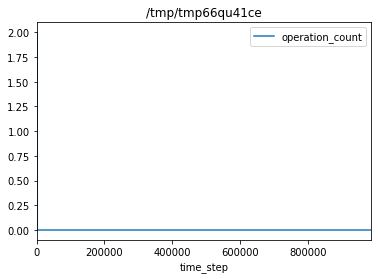

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_cosmic_tagging_train.csv


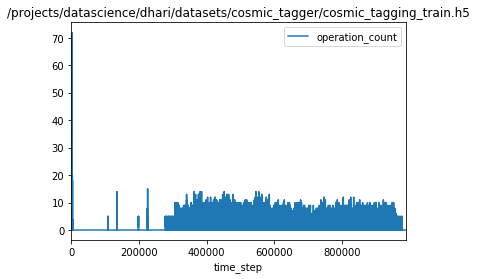

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmphfgkse3k.csv


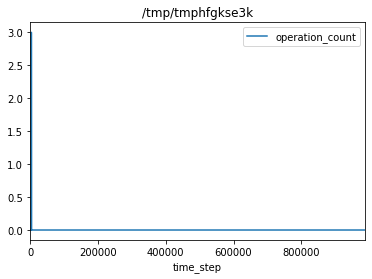

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_cosmic_tagging_test.csv


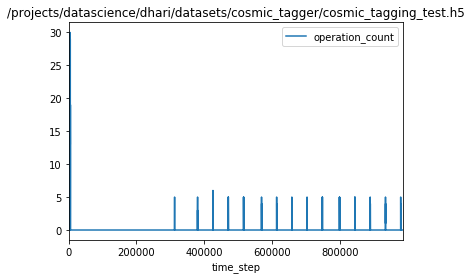

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_checkpoint.csv


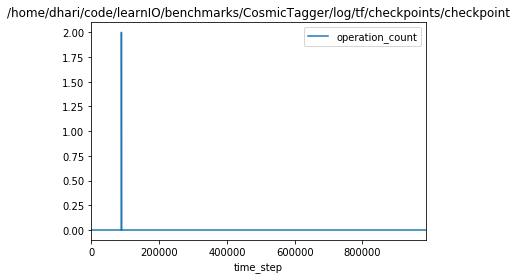

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_model_500.ckpt.csv


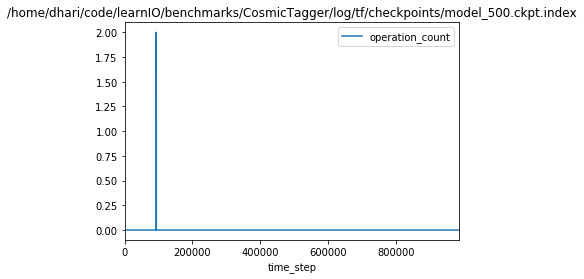

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_model_500.ckpt.csv


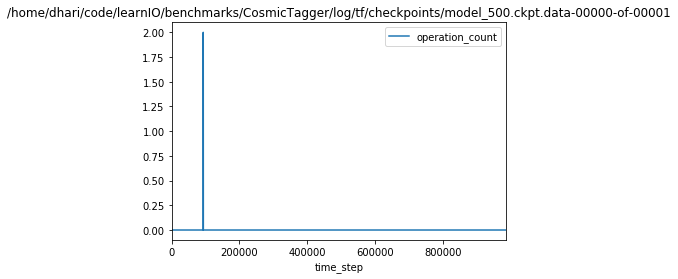

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmplb8hllhq.csv


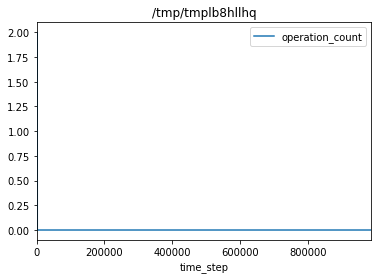

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpalpibp7q.csv


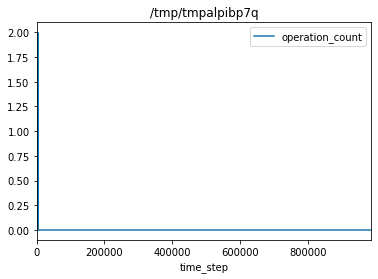

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmp7nm4l3qc.csv


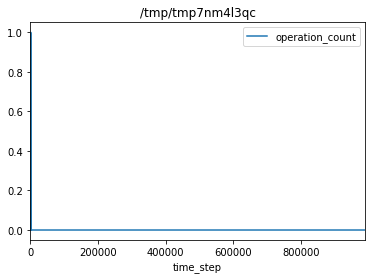

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpw8i445_z.csv


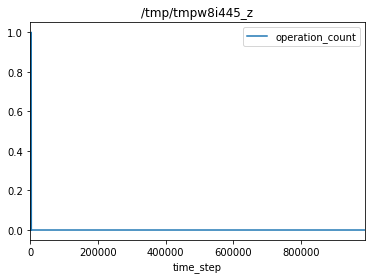

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpcnmnurcv.csv


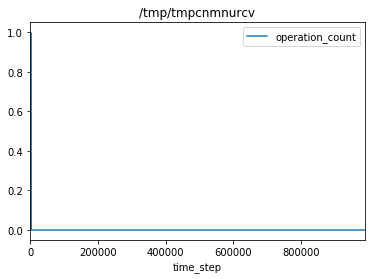

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpbadhhqkx.csv


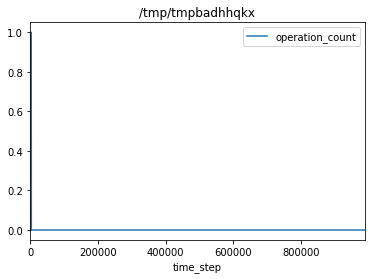

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpl8zm9nrv.csv


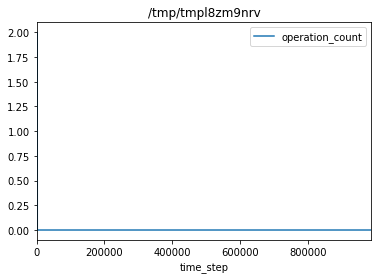

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpz44wgkwn.csv


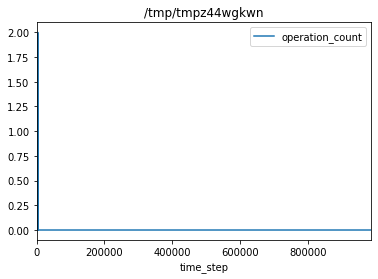

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpu18lsxql.csv


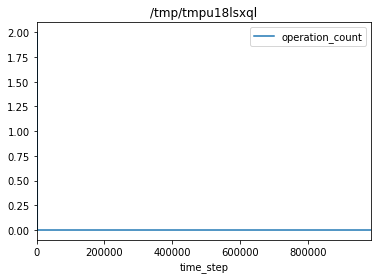

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmp7xppt7ag.csv


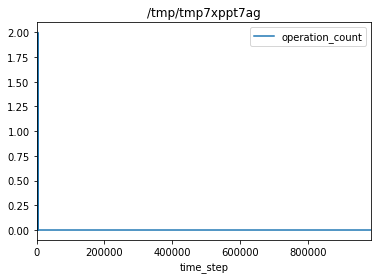

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmp3x37c0i3.csv


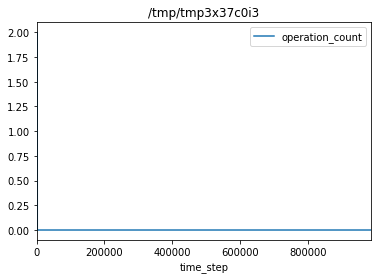

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmp_hxfhj25.csv


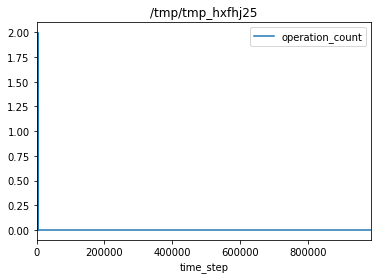

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmp5avhrxc1.csv


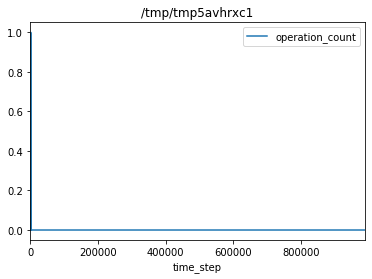

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_tmpup9vpdq7.csv


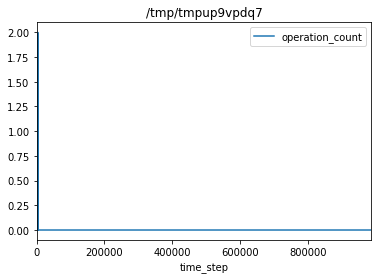

In [22]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run2_p8_tm_df_0.csv


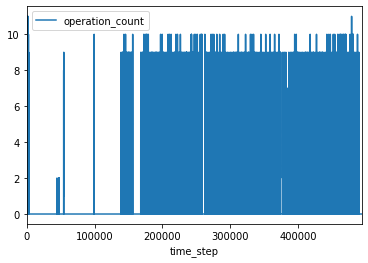

[============================================================] 100.0% 38668 of 38668 Creating Timeline 


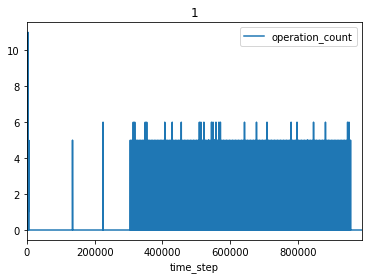

[============================================================] 100.0% 38832 of 38832 Creating Timeline 


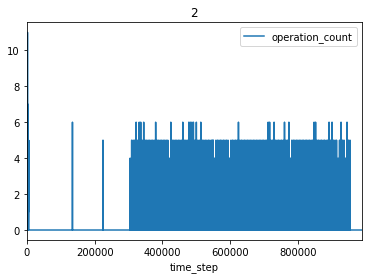

[============================================================] 100.0% 38577 of 38577 Creating Timeline 


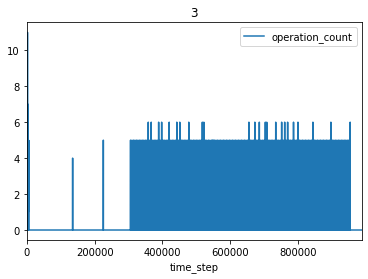

[============================================================] 100.0% 38747 of 38747 Creating Timeline 


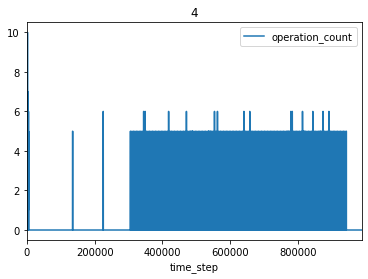

[============================================================] 100.0% 38285 of 38285 Creating Timeline 


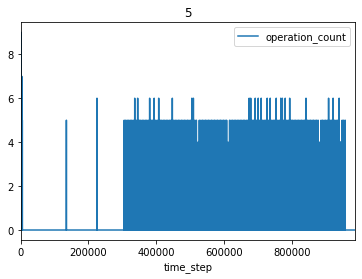

[============================================================] 100.0% 38561 of 38561 Creating Timeline 


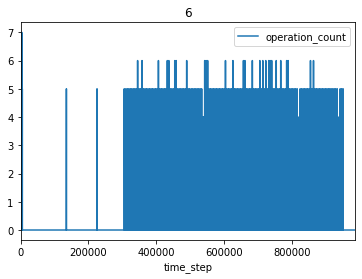

[============================================================] 100.0% 38898 of 38898 Creating Timeline 


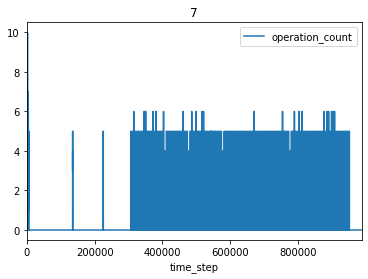

In [23]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

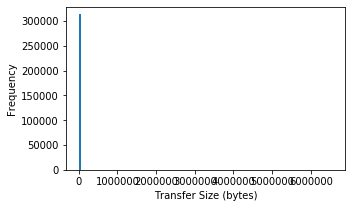

In [24]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3), bins=100);
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

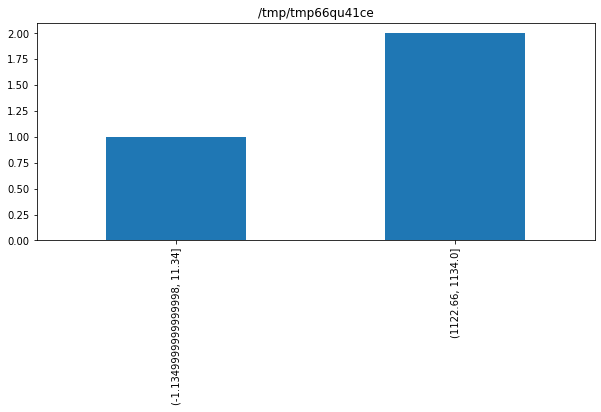

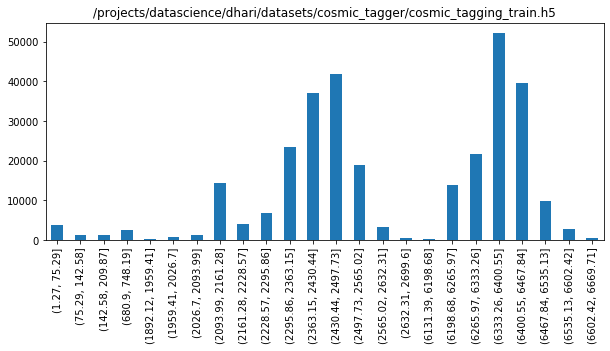

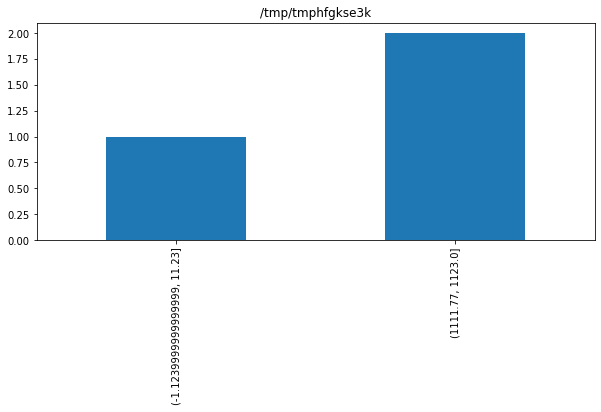

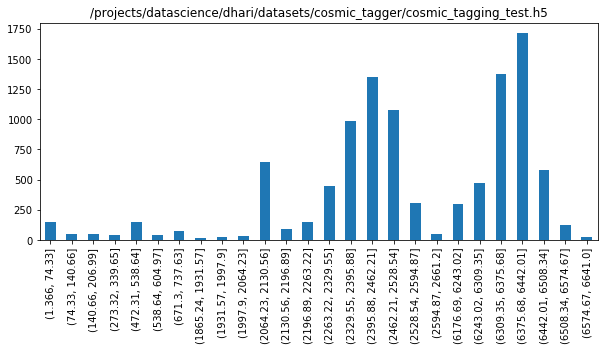

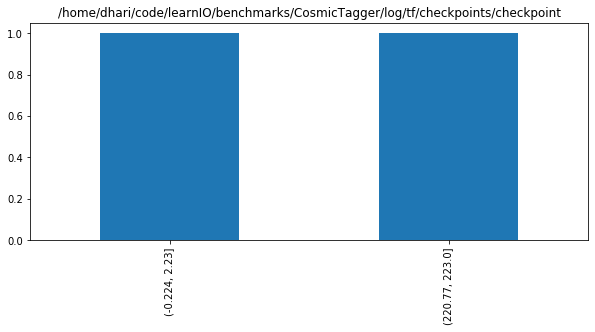

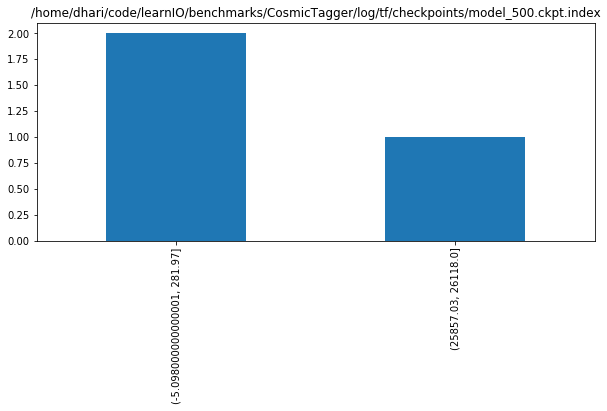

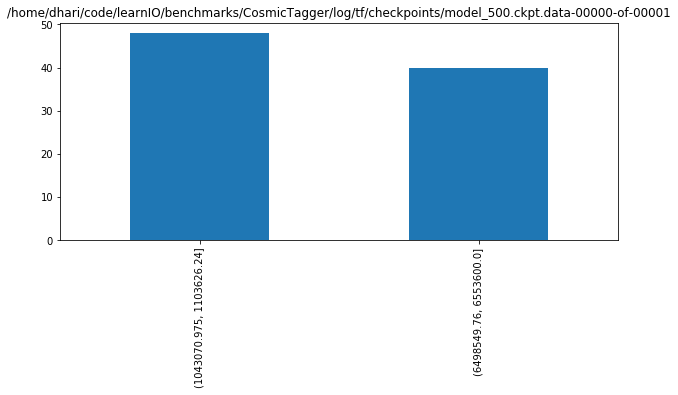

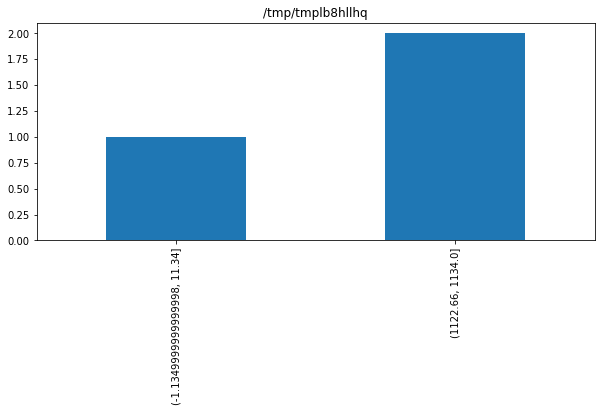

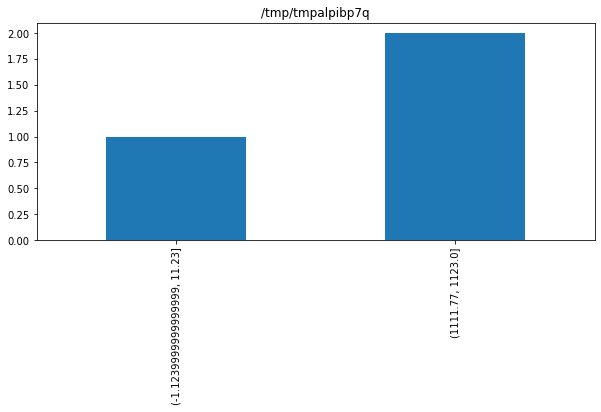

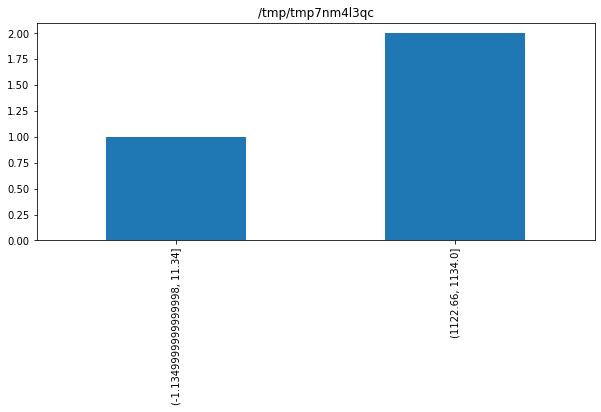

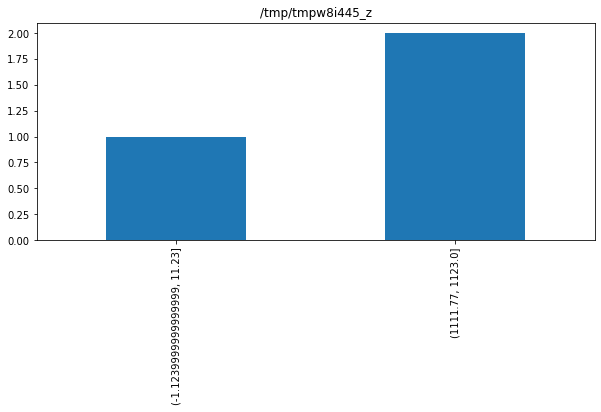

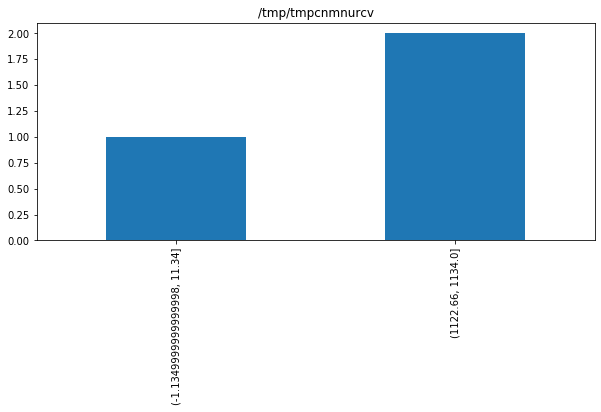

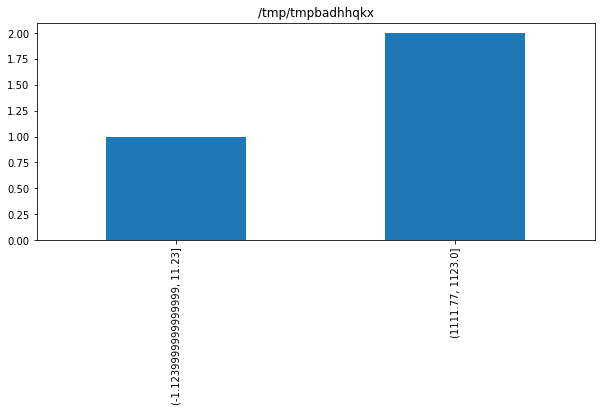

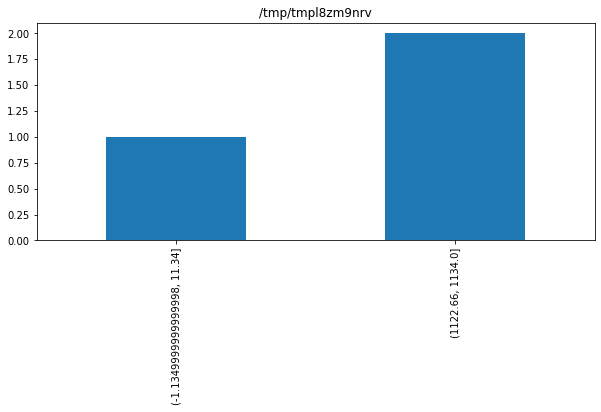

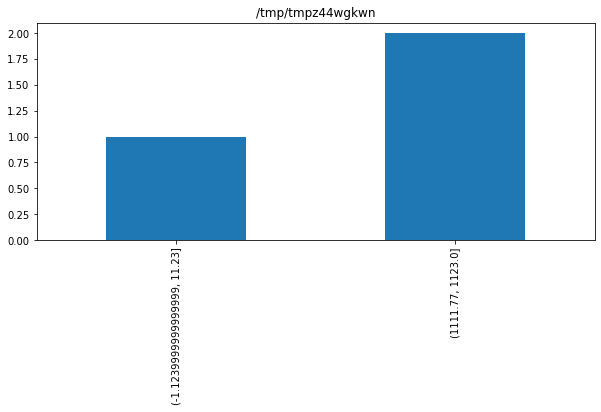

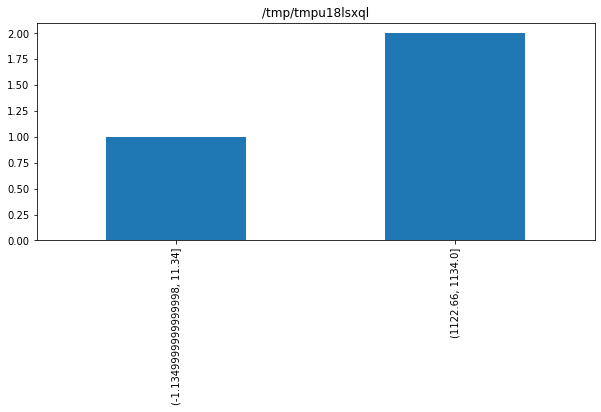

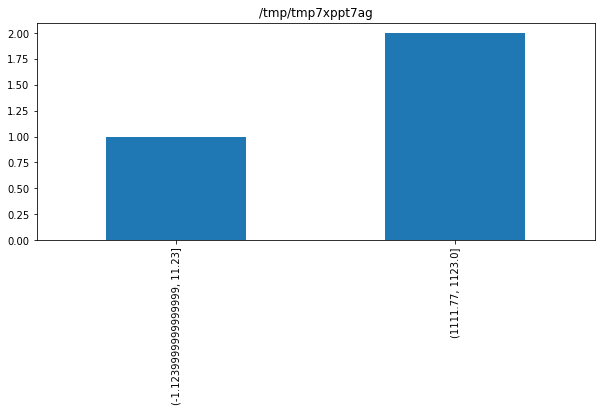

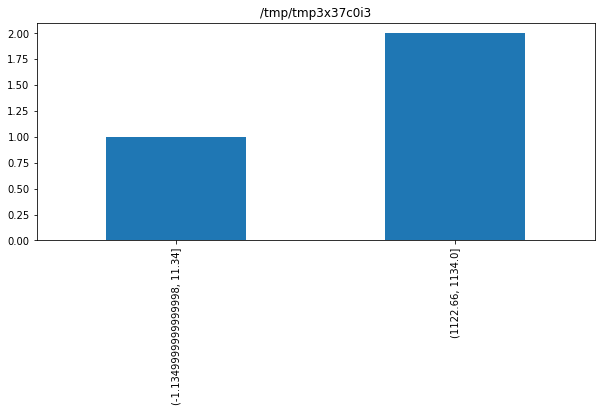

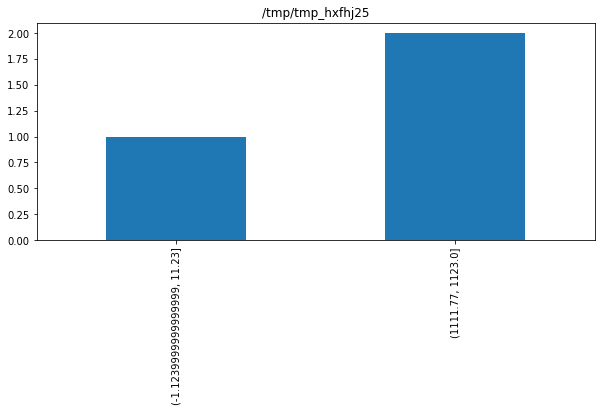

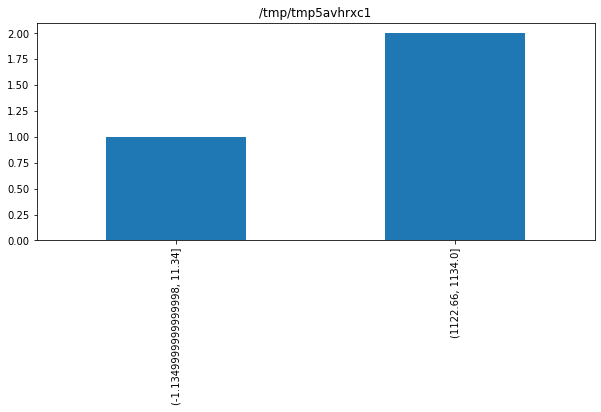

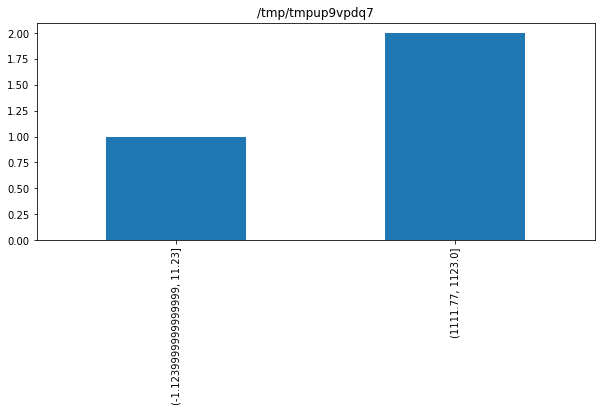

In [25]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

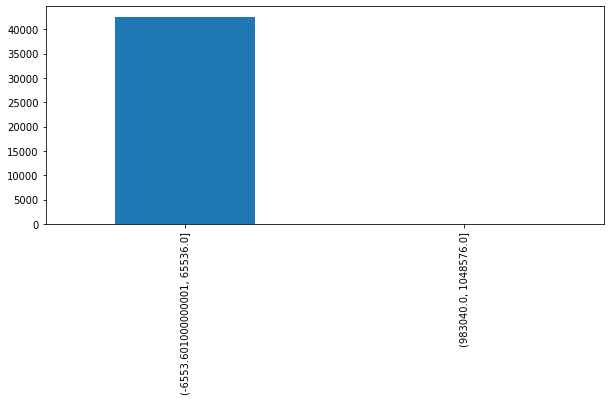

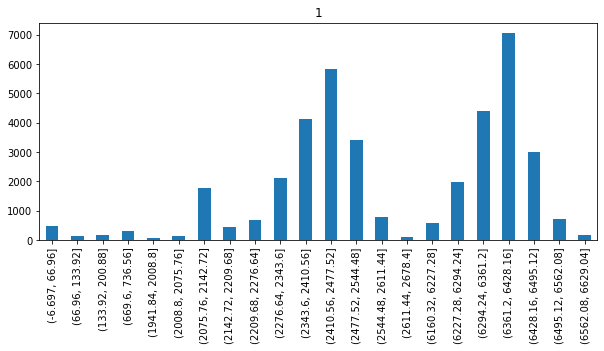

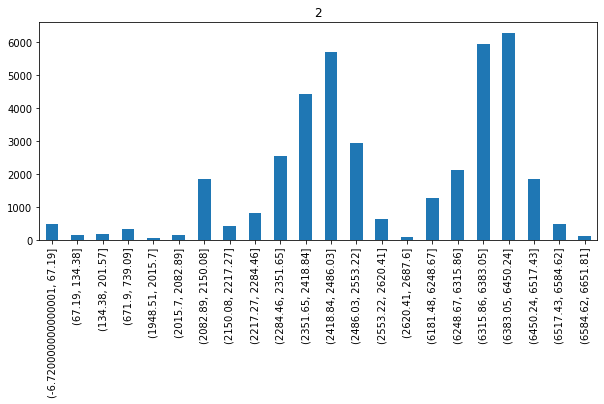

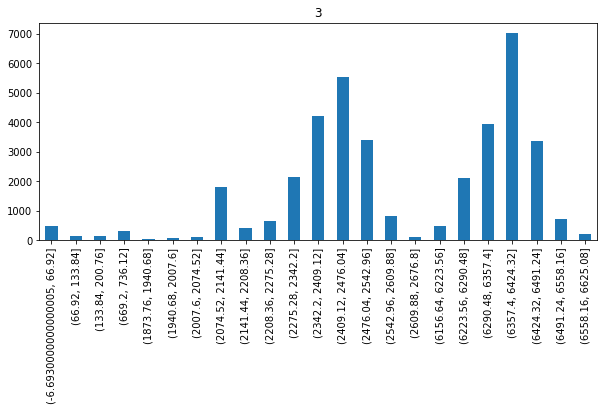

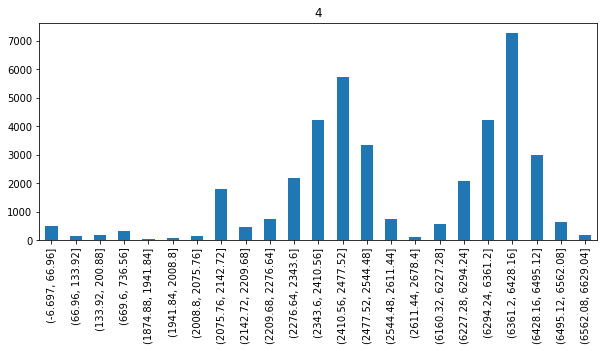

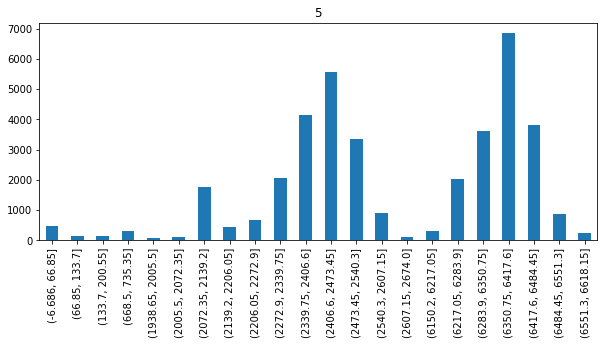

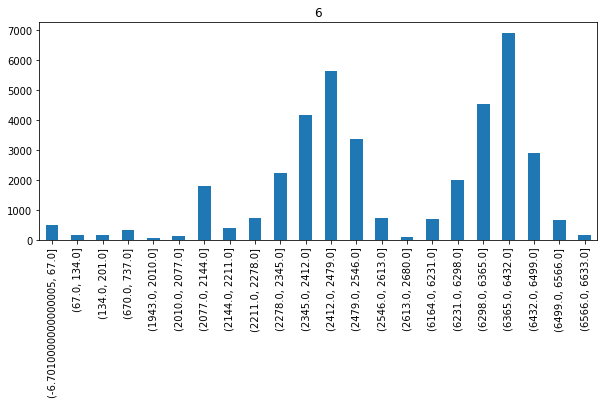

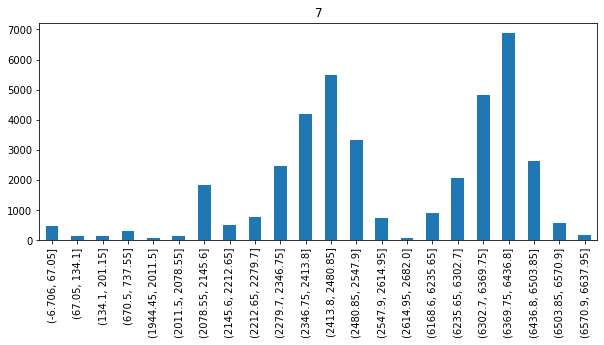

In [26]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [27]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'h5',
 'filename': 'cosmic_tagging_train',
 'io_size': 1265261183,
 'io_time': 43.92996249999975,
 'path': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
 'size': 30272777678,
 'special': {'keys': [{'keys': [{'keys': [{'name': 'cluster_extents',
                                           'obj': <HDF5 dataset "cluster_extents": shape (129225,), type "|V16">,
                                           'shape': (129225,),
                                           'size': 129225,
                                           'type': 'dataset'},
                                          {'name': 'extents',
                                           'obj': <HDF5 dataset "extents": shape (43075,), type "|V16">,
                                           'shape': (43075,),
                                           'size': 43075,
                                           'type': 'dataset'},
                                          {'name': 'image_meta',
 

{'ext': 'h5',
 'filename': 'cosmic_tagging_test',
 'io_size': 41764653,
 'io_time': 2.2294249999998876,
 'path': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5',
 'size': 5155110775,
 'special': {'keys': [{'keys': [{'keys': [{'name': 'cluster_extents',
                                           'obj': <HDF5 dataset "cluster_extents": shape (22086,), type "|V16">,
                                           'shape': (22086,),
                                           'size': 22086,
                                           'type': 'dataset'},
                                          {'name': 'extents',
                                           'obj': <HDF5 dataset "extents": shape (7362,), type "|V16">,
                                           'shape': (7362,),
                                           'size': 7362,
                                           'type': 'dataset'},
                                          {'name': 'image_meta',
           

{'ext': 'index',
 'filename': 'model_500.ckpt',
 'io_size': 26187,
 'io_time': 0.033799999999999386,
 'path': '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.index',
 'size': 26200,
 'special': {}}
{'ext': 'data-00000-of-00001',
 'filename': 'model_500.ckpt',
 'io_size': 312475648,
 'io_time': 1.866800000000012,
 'path': '/home/dhari/code/learnIO/benchmarks/CosmicTagger/log/tf/checkpoints/model_500.ckpt.data-00000-of-00001',
 'size': 292770360,
 'special': {}}


In [28]:
profile.CreateChromeTimeline(location="/projects/datascience/dhari", filename="cosmic_run2_p8_io.json")

[============================================================] 100.0% 313240 of 313240 Creating DXT Timeline 
[============================================================] 100.0% 47 of 47 Creating DXT Timeline 


{'traceEvents': [{'name': '/tmp/tmpu18lsxql',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 1802100,
   'pid': 5,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/tmp/tmpu18lsxql',
    'Rank': 5,
    'Operation': 'write',
    'Segment': 0,
    'Offset': 0,
    'Length': 1134,
    'Start': 1.8021,
    'End': 1.8022}},
  {'ph': 'E',
   'ts': 1802200,
   'pid': 5,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/tmp/tmpu18lsxql',
    'Rank': 5,
    'Operation': 'write',
    'Segment': 0,
    'Offset': 0,
    'Length': 1134,
    'Start': 1.8021,
    'End': 1.8022}},
  {'name': '/tmp/tmp3x37c0i3',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 1802200,
   'pid': 6,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/tmp/tmp3x37c0i3',
    'Rank': 6,
    'Operation': 'write',
    'Segment': 0,
    'Offset': 0,
    'Length': 1134,
    'Start': 1.8022,
    'End': 1.8023}},
  {'name': '/tmp/tmp7nm4l3qc',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 1802300,
  

In [29]:
tensorboard_dir="/home/dhari/tf_profiler_logs/apps/cosmic_tagger/run2_p8"
merged_timeline_output_dir = "/projects/datascience/dhari"
merged_timeline_file_prefix = "run2_p8"
val = profile.CreateMergedTimeline(tensorboard_dir, merged_timeline_output_dir, merged_timeline_file_prefix, save=True, split_by_ranks=True, timeshift=2.745017)


[============================================================] 100.0% 8 of 8 Parsing TF logs for hostname and Rank 
[============================================================] 100.0% 313240 of 313240 Creating DXT Timeline 
[============================================================] 100.0% 47 of 47 Creating DXT Timeline 
merging

[============================================================] 100.0% 8 of 8 Merging darshan with tf timeline 
written /projects/datascience/dhari/run2_p8_complete.json.gz
[============================================================] 100.0% 8573746 of 8573746 Splitting timeline by rank 
written /projects/datascience/dhari/run2_p8_r0.json.gz
written /projects/datascience/dhari/run2_p8_r1.json.gz
written /projects/datascience/dhari/run2_p8_r2.json.gz
written /projects/datascience/dhari/run2_p8_r3.json.gz
written /projects/datascience/dhari/run2_p8_r4.json.gz
written /projects/datascience/dhari/run2_p8_r5.json.gz
written /projects/datascience/dhari/run2_p8